In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

#### Load in Dataframes

In [8]:
df_a = pd.read_csv('/home/yelhe/scratch/df/df_accident_0_295.csv')
df_p = pd.read_csv('/home/yelhe/scratch/df/df_pseudo_0_792_new.csv')

In [9]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55960 entries, 0 to 55959
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               55960 non-null  int64  
 1   gmedian            55960 non-null  float64
 2   rmedian            55960 non-null  float64
 3   bmedian            55960 non-null  float64
 4   gmean              55960 non-null  float64
 5   rmean              55960 non-null  float64
 6   bmean              55960 non-null  float64
 7   gstd               55960 non-null  float64
 8   rstd               55960 non-null  float64
 9   bstd               55960 non-null  float64
 10  gq25               55960 non-null  float64
 11  gq75               55960 non-null  float64
 12  rq25               55960 non-null  float64
 13  rq75               55960 non-null  float64
 14  bq25               55960 non-null  float64
 15  bq75               55960 non-null  float64
 16  cdmean             559

In [10]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138032 entries, 0 to 138031
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   mask               138032 non-null  int64  
 1   gmedian            138032 non-null  float64
 2   rmedian            138032 non-null  float64
 3   bmedian            138032 non-null  float64
 4   gmean              138032 non-null  float64
 5   rmean              138032 non-null  float64
 6   bmean              138032 non-null  float64
 7   gstd               138032 non-null  float64
 8   rstd               138032 non-null  float64
 9   bstd               138032 non-null  float64
 10  gq25               138032 non-null  float64
 11  gq75               138032 non-null  float64
 12  rq25               138032 non-null  float64
 13  rq75               138032 non-null  float64
 14  bq25               138032 non-null  float64
 15  bq75               138032 non-null  float64
 16  cd

#### For entropy - whole scene

In [13]:
dfae = df_a
dfpe = df_p
# Drop info columns
dfae = dfae.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside'], axis = 1)
dfpe = dfpe.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside'], axis = 1)

In [14]:
dfae.shape, dfpe.shape

((55960, 32), (138032, 32))

In [15]:
rfe = joblib.load("my_random_forest_2_whole7.joblib")

In [16]:
# 1 curb, 2 infrastructure
# 0 building, 3 means_of_transportation, 4 other, 5 sky, 6 vegetation

In [17]:
# rf.fit(X_train3, y_train3)
y_pred_aw = rfe.predict(dfae)
print(np.unique(y_pred_aw, return_counts=True))
y_pred_pw = rfe.predict(dfpe)
print(np.unique(y_pred_pw, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([ 5791,   308,  9166,  1611, 30187,  1764,  7133]))
(array([0, 1, 2, 3, 4, 5, 6]), array([15665,   938, 21583,  3794, 80227,  3345, 12480]))


In [18]:
dfael = dfae
dfael['p'] = y_pred_aw
dfpel = dfpe
dfpel['p'] = y_pred_pw

In [19]:
dfael.columns

Index(['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd',
       'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity',
       'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'leftm', 'rightm', 'topm', 'bottomm', 'p'],
      dtype='object')

In [20]:
dfa1 = df_a
dfp1 = df_p
# dataframe_accident_forentropy_predicted_label
dfa_epl = pd.merge(dfa1, dfael, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])
# dataframe_pseudo_forentropy_predicted_label
dfp_epl = pd.merge(dfp1, dfpel, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])

In [21]:
dfa_epl.groupby(['p']).size().reset_index().rename(columns={0:'count'})

,p,count
0,0,5957
1,1,316
2,2,9490
3,3,1655
4,4,30879
5,5,1798
6,6,7239


In [22]:
dfa_epl['p'].unique()

array([5, 2, 6, 0, 3, 4, 1])

In [23]:
# dfa_epl.to_csv('/home/yelhe/script/mt/output/pred_accident_label_whole7.csv', index = False)
# dfp_epl.to_csv('/home/yelhe/script/mt/output/pred_pseudo_label_whole7.csv', index = False)

#### For entropy of ground scene

In [31]:
dfai = dfa_epl
dfpi = dfp_epl

In [32]:
# Using the infrastructure groups recognized by model above
# 1 curb, 2 infrastructure
dfai = dfa_epl.loc[(dfa_epl['p'] == 1)|(dfa_epl['p'] == 2)]
dfpi = dfp_epl.loc[(dfp_epl['p'] == 1)|(dfp_epl['p'] == 2)]

In [33]:
dfai.shape, dfpi.shape

((9806, 38), (23307, 38))

In [34]:
rfi = joblib.load("my_random_forest_3_ground7_new1.joblib")
# rfi = joblib.load("my_random_forest_3_ground7.joblib")

In [35]:
# Drop info columns
dfai = dfai.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'p'], axis = 1)
dfpi = dfpi.drop(['mask', 'Nr','isconvex','is_cen_inside','is_mce_inside', 'p'], axis = 1)

In [36]:
# 0 bike lane, 1 curb, 2 ground_sign, 3 manhole, 4 other, 5 pavement, 6 road

In [37]:
# rf.fit(X_train3, y_train3)
y_pred_ai = rfi.predict(dfai)
print(np.unique(y_pred_ai, return_counts=True))
y_pred_pi = rfi.predict(dfpi)
print(np.unique(y_pred_pi, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6]), array([  12,  503, 2809,  430, 2854, 1395, 1803]))
(array([0, 1, 2, 3, 4, 5, 6]), array([  19, 1321, 6009,  944, 6298, 3575, 5141]))


In [38]:
dfail = dfai
dfail['p'] = y_pred_ai
dfpil = dfpi
dfpil['p'] = y_pred_pi

In [39]:
dfa1 = df_a
dfp1 = df_p
# dataframe_accident_forentropy_infrastructure_ground_predicted_label
dfa_eipl = pd.merge(dfa1, dfail, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])
# dataframe_pseudo_forentropy_infrastructure_ground_predicted_label
dfp_eipl = pd.merge(dfp1, dfpil, on = ['gmedian', 'rmedian', 'bmedian', 'gmean', 
                                   'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 
                                   'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 
                                   'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 
                                   'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 
                                   'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'bottomm',
                                   'topm', 'leftm', 'rightm'])

In [40]:
dfa_eipl.to_csv('/home/yelhe/script/mt/output/pred_accident_label_ground7_new.csv', index = False)
dfp_eipl.to_csv('/home/yelhe/script/mt/output/pred_pseudo_label_ground7_new.csv', index = False)

#### Entropy calculation

##### For the whole scene

In [32]:
# Using dfa_epl & dfp_epl
dfa_epl.columns

Index(['mask', 'gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean',
       'gstd', 'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'isconvex', 'area', 'aspect_ratio_wh_s', 'extent_s',
       'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'is_cen_inside', 'is_mce_inside', 'leftm',
       'rightm', 'topm', 'bottomm', 'Nr', 'p'],
      dtype='object')

In [33]:
dfa_epl.head()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,ratio_ell,perimeter,is_cen_inside,is_mce_inside,leftm,rightm,topm,bottomm,Nr,p
0,1,244.0,248.0,237.0,240.730656,245.506949,232.780832,12.440094,8.665818,17.859522,...,2.712297,2958.881371,1.0,1.0,0,639,0,297,999000608525971,5
1,2,121.0,118.0,119.0,125.207882,121.692088,123.851176,28.212500,28.467390,27.957547,...,2.441359,1026.933108,1.0,1.0,288,604,367,534,999000608525971,2
2,3,244.0,248.0,237.0,240.717879,245.472134,232.790564,12.579833,8.892382,17.936509,...,2.835151,2765.910810,1.0,1.0,0,639,0,298,999000608525971,5
3,4,102.0,55.0,84.0,115.255602,74.179253,98.845643,46.973404,55.987560,49.051072,...,1.540817,139.982755,1.0,1.0,246,278,270,318,999000608525971,6
4,5,115.0,117.0,111.0,113.090287,114.524478,109.461159,17.588751,17.982858,16.838046,...,2.304478,990.340181,1.0,-1.0,410,639,326,507,999000608525971,2


In [34]:
# Accident whole scene entropy
awe = dfa_epl[['Nr', 'p']]
pwe = dfp_epl[['Nr', 'p']]

In [40]:
awe.loc[:,'Nr'] = awe.loc[:,'Nr'].values.astype(str)
awe.loc[:,'id'] = awe.Nr.str[-15:-1]
awe.loc[:,'dir'] = awe.Nr.str[-1]

pwe.loc[:,'Nr'] = pwe.loc[:,'Nr'].values.astype(str)
pwe.loc[:,'Nr'] = pwe.loc[:,'Nr'].str.zfill(5)
pwe.loc[:,'id'] = pwe.Nr.str[-5:-1]
pwe.loc[:,'dir'] = pwe.Nr.str[-1]

In [41]:
# Predicted curb in accident points summary
awes = awe.groupby(['id', 'dir', 'p']).size().reset_index().rename(columns={0:'count'})
# Predicted curb in pseudo points summary
pwes = pwe.groupby(['id', 'dir','p']).size().reset_index().rename(columns={0:'count'})

In [37]:
# awes.to_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_count.csv', index = False)
# pwes.to_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_count.csv', index = False)

In [147]:
awes['p'].unique()

array([0, 2, 4, 5, 6, 3, 1])

In [ ]:
# For each location, each direction, the image have an entropy 
# 1. entropy based on the histogram of pixels
# 2. entropy based on the recognized masks, of 7 mask groups

## Here are the entropy based on the recognized masks 

In [43]:
from scipy.stats import entropy

In [75]:
totala = awes.groupby(['id','dir']).sum().reset_index().rename(columns = {'count':'sum'})
totala = totala.drop(['p'], axis = 1)

In [76]:
totala.columns

Index(['id', 'dir', 'sum'], dtype='object')

In [129]:
dfa = pd.merge(awes, totala, on = ['id', 'dir'])

In [130]:
dfa['percentage'] = dfa['count']/dfa['sum']

In [131]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          6538 non-null   object 
 1   dir         6538 non-null   object 
 2   p           6538 non-null   int64  
 3   count       6538 non-null   int64  
 4   sum         6538 non-null   int64  
 5   percentage  6538 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 306.6+ KB


In [132]:
dfa['id_dir'] = dfa['id'] + dfa['dir']

In [193]:
# grouped_arrays_agg = dfa.groupby(['id', 'dir'])['percentage'].agg(np.array)
grouped = dfa.groupby('id_dir')

# Convert groups to NumPy arrays using list comprehension
grouped_arrays_list = {id_dir: dfa['percentage'].iloc[indices].values for id_dir, indices in grouped.groups.items()}

# print(grouped_arrays_list)

In [134]:
iddirl = list(grouped_arrays_list.keys())

In [135]:
grouped_arrays_list[iddirl[1]]

array([0.09090909, 0.06060606, 0.04545455, 0.68181818, 0.01515152,
       0.10606061])

In [136]:
en = []
for i in range(0, len(iddirl)):
    l = grouped_arrays_list[iddirl[i]]
    e = entropy(l)
    en.append(e)

In [137]:
entropy(grouped_arrays_list[iddirl[0]])

0.9453221668599062

In [138]:
entropy(np.array([0.2,0.2,0.2,0.2,0.2]))

1.6094379124341005

In [139]:
entropy(np.array([0.01,0.01,0.01,0.02,0.95]))

0.2651241953563787

In [142]:
dfena = pd.DataFrame()
dfena['id_dir'] = iddirl
dfena['entropy'] = en

In [141]:
dfena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iddir    1180 non-null   object 
 1   entropy  1180 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


In [143]:
dfentropya = pd.merge(dfa, dfena, on = ['id_dir'])

In [145]:
# dfentropya
dfentropya.to_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_entropy.csv', index = False)

(array([   7.,   13.,  103.,  161.,  494.,  944., 1658., 2158.,  865.,
         135.]),
 array([0.20334926, 0.36082709, 0.51830492, 0.67578275, 0.83326058,
        0.99073842, 1.14821625, 1.30569408, 1.46317191, 1.62064974,
        1.77812757]),
 <BarContainer object of 10 artists>)

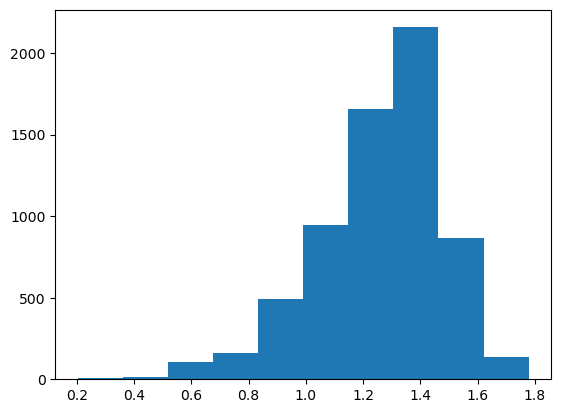

In [146]:
plt.hist(dfentropya['entropy'])

In [155]:
totalp = pwes.groupby(['id','dir']).sum().reset_index().rename(columns = {'count':'sum'})
totalp = totalp.drop(['p'], axis = 1)
dfp = pd.merge(pwes, totalp, on = ['id', 'dir'])
dfp['percentage'] = dfp['count']/dfp['sum']
dfp['id_dir'] = dfp['id'] + dfp['dir']

In [156]:
groupedp = dfp.groupby('id_dir')
grouped_arrays_listp = {id_dir: dfp['percentage'].iloc[indices].values for id_dir, indices in groupedp.groups.items()}


In [157]:
iddirlp = list(grouped_arrays_listp.keys())
enp = []
for i in range(0, len(iddirlp)):
    l = grouped_arrays_listp[iddirlp[i]]
    e = entropy(l)
    enp.append(e)

In [158]:
dfenp = pd.DataFrame()
dfenp['id_dir'] = iddirlp
dfenp['entropy'] = enp
dfentropyp = pd.merge(dfp, dfenp, on = ['id_dir'])

In [159]:
dfentropyp.to_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_entropy.csv', index = False)

(array([2.000e+00, 1.600e+01, 9.400e+01, 2.860e+02, 1.246e+03, 3.369e+03,
        5.362e+03, 4.574e+03, 1.678e+03, 1.650e+02]),
 array([0.1540761 , 0.31356557, 0.47305503, 0.6325445 , 0.79203396,
        0.95152343, 1.11101289, 1.27050236, 1.42999182, 1.58948129,
        1.74897075]),
 <BarContainer object of 10 artists>)

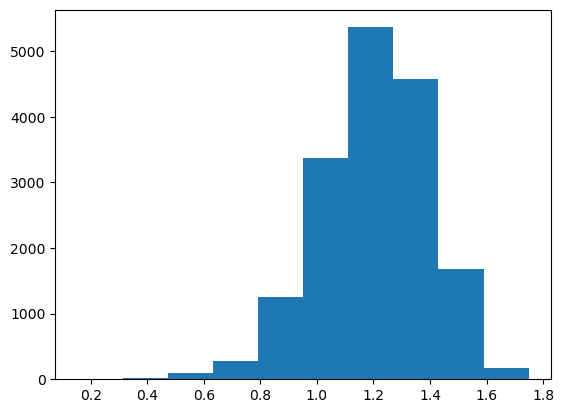

In [160]:
plt.hist(dfentropyp['entropy'])

In [161]:
dfentropyp

,id,dir,p,count,sum,percentage,id_dir,entropy
0,0002,1,2,8,38,0.210526,00021,1.136558
1,0002,1,4,18,38,0.473684,00021,1.136558
2,0002,1,5,1,38,0.026316,00021,1.136558
3,0002,1,6,11,38,0.289474,00021,1.136558
4,0002,2,0,5,50,0.100000,00022,1.268073
...,...,...,...,...,...,...,...,...
16787,0994,3,5,2,24,0.083333,09943,1.105625
16788,0994,4,0,2,22,0.090909,09944,0.861790
16789,0994,4,2,1,22,0.045455,09944,0.861790
16790,0994,4,4,16,22,0.727273,09944,0.861790


In [163]:
len(dfentropyp['id'].unique())

792

In [41]:
# Function for entropy calculation
# The input dataframe should include columns 'id', 'Nr', 'p', 'count'
def entropy_calculate(df):
    total = df.groupby(['id','dir']).sum().reset_index().rename(columns = {'count':'sum'})
    total = total.drop(['p'], axis = 1)
    dft = pd.merge(df, total, on = ['id', 'dir'])
    dft['percentage'] = dft['count']/dft['sum']
    dft['id_dir'] = dft['id'] + dft['dir']
    grouped = dft.groupby('id_dir')
    grouped_arrays_list = {id_dir: dft['percentage'].iloc[indices].values for id_dir, indices in grouped.groups.items()}
    iddirl = list(grouped_arrays_list.keys())
    en = []
    for i in range(0, len(iddirl)):
        l = grouped_arrays_list[iddirl[i]]
        e = entropy(l)
        en.append(e)
    dfen = pd.DataFrame()
    dfen['id_dir'] = iddirl
    dfen['entropy'] = en
    dfentropy = pd.merge(dft, dfen, on = ['id_dir'])
    return dfentropy

##### For the ground scene

In [42]:
# With dataframe dfa_eipl & dfp_eipl 
# Preparing aie (accident_ground_infrastructure_entropy)
# Preparing pie (pseudo_ground_infrastructure_entropy
aie = dfa_eipl.loc[:, ['Nr','p']]
pie = dfp_eipl.loc[:, ['Nr','p']]


aie.loc[:,'Nr'] = aie.loc[:,'Nr'].values.astype(str)
aie.loc[:,'id'] = aie.Nr.str[-15:-1]
aie.loc[:,'dir'] = aie.Nr.str[-1]

pie.loc[:,'Nr'] = pie.loc[:,'Nr'].values.astype(str)
pie.loc[:,'Nr'] = pie.loc[:,'Nr'].str.zfill(5)
pie.loc[:,'id'] = pie.Nr.str[-5:-1]
pie.loc[:,'dir'] = pie.Nr.str[-1]

In [53]:
# Predicted curb in accident points summary in ground_infrastructure scene
aies = aie.groupby(['id', 'dir', 'p']).size().reset_index().rename(columns={0:'count'})
# Predicted curb in pseudo points summary in ground_infrastructure scene
pies = pie.groupby(['id', 'dir', 'p']).size().reset_index().rename(columns={0:'count'})

# Predicted label groups (in total 7) for ground infrastructure scene
aies.to_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_groundinf_count_new.csv', index = False)
pies.to_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_groundinf_count_new.csv', index = False)


In [44]:
aies

,id,dir,p,count
0,99900044963840,1,4,1
1,99900044963840,1,6,1
2,99900044963840,2,2,1
3,99900044963840,2,4,2
4,99900044963840,2,6,1
...,...,...,...,...
4200,99900064009230,3,5,1
4201,99900064009230,3,6,1
4202,99900064009230,4,1,1
4203,99900064009230,4,4,2


In [45]:
dfentropya_i = entropy_calculate(aies)

In [46]:
dfentropyp_i = entropy_calculate(pies)

In [52]:
dfentropya_i.to_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_gi_entropy_new.csv', index = False)
dfentropyp_i.to_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_gi_entropy_new.csv', index = False)

In [48]:
len(dfentropya_i['id'].unique())

295

(array([ 115.,    4.,  112.,  836.,  373., 1978., 1932., 3147., 1982.,
         571.]),
 array([0.        , 0.17489708, 0.34979415, 0.52469123, 0.6995883 ,
        0.87448538, 1.04938245, 1.22427953, 1.3991766 , 1.57407368,
        1.74897075]),
 <BarContainer object of 10 artists>)

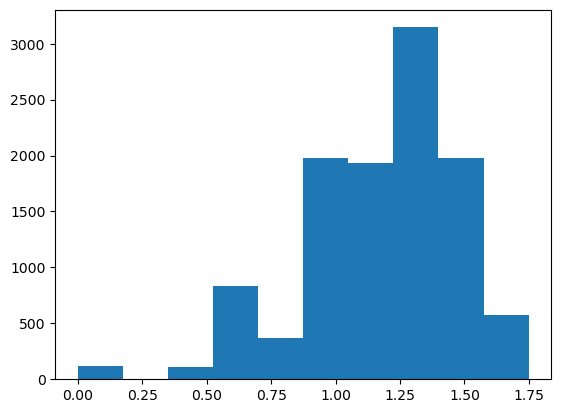

In [49]:
plt.hist(dfentropyp_i['entropy'])

#### Summarize average entropy for each location (whole scene & ground scene)

In [ ]:
# dfentropya
# dfentropyp
# dfentropya_i
# dfentropyp_i

In [199]:
# Entropy whole-scene mean for accident points
ewam = dfentropya.groupby('id')['entropy'].mean()
ewam = ewam.to_frame()
ewam = ewam.reset_index()
# Entropy whole-scene mean for pseudo points
ewpm = dfentropyp.groupby('id')['entropy'].mean()
ewpm = ewpm.to_frame()
ewpm = ewpm.reset_index()


In [50]:
# Entropy ground-scene mean for accidnet points
egam = dfentropya_i.groupby('id')['entropy'].mean()
egam = egam.to_frame()
egam = egam.reset_index()
# Entropy ground-scene mean for pseudo points
egpm = dfentropyp_i.groupby('id')['entropy'].mean()
egpm = egpm.to_frame()
egpm = egpm.reset_index()

In [205]:
# ewam.to_csv('/home/yelhe/script/mt/output/accident_mask_entropy_wholescene_mean.csv', index = False)
# ewpm.to_csv('/home/yelhe/script/mt/output/pseudo_mask_entropy_wholescene_mean.csv', index = False)
# egam.to_csv('/home/yelhe/script/mt/output/accident_mask_entropy_groundscene_mean.csv', index = False)
# egpm.to_csv('/home/yelhe/script/mt/output/pseudo_mask_entropy_groundscene_mean.csv', index = False)

In [51]:
egam.to_csv('/home/yelhe/script/mt/output/accident_mask_entropy_groundscene_mean_new.csv', index = False)
egpm.to_csv('/home/yelhe/script/mt/output/pseudo_mask_entropy_groundscene_mean_new.csv', index = False)